In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
wine_data_path = "../data/winemag-data-130k-v2.csv" 

In [4]:
missing_values = ["n/a", "na", "--"]
raw_wine_data = pd.read_csv(wine_data_path, na_values = missing_values)

def get_year(string, list):
    for word in string.split():
        if word.isdigit():
            list.append(word)
            return True

    list.append('NaN')
    return False

# Test if data is read properly
raw_wine_data.sample(5)

years = []
raw_wine_data['title'].apply(lambda x: get_year(x, years))
raw_wine_data['year'] = years

raw_wine_data['description_length'] = raw_wine_data['description'].apply(lambda x: len(str(x).split(" ")))
raw_wine_data = raw_wine_data[raw_wine_data['description_length'] > 6]
raw_wine_data.sample(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,description_length
117673,117673,Greece,Vibrant tropical fruit and citrus on the nose ...,Château Julia,88,15.0,Drama,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Domaine Costa Lazaridi 2009 Château Julia Char...,Chardonnay,Domaine Costa Lazaridi,2009,40
117116,117116,US,"Two fistfuls of Merlot help soften this wine, ...",Broken Rock Vineyard,93,80.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Prime Solum 2012 Broken Rock Vineyard Cabernet...,Cabernet Sauvignon,Prime Solum,2012,46
11726,11726,Austria,Restrained aromatics slowly release notes of s...,"Gemischter Satz aus Merlot, Syrah & Zweigelt",90,NaN,Niederösterreich,NaN,NaN,Anne Krebiehl MW,@AnneInVino,"Weixelbaum 2013 Gemischter Satz aus Merlot, Sy...",Rosé,Weixelbaum,2013,28
16029,16029,France,"This is a round, silky Châteauneuf-du-Pape tha...",Secret de Nos Vignes,88,37.0,Rhône Valley,Châteauneuf-du-Pape,NaN,Joe Czerwinski,@JoeCz,Domaine de Châteaumar 2009 Secret de Nos Vigne...,Rhône-style Red Blend,Domaine de Châteaumar,2009,33
78879,78879,US,"Overtly sweet, like a sugary donut with pineap...",The Other,81,12.0,California,Lodi,Central Valley,NaN,NaN,Peirano 2007 The Other White (Lodi),White Blend,Peirano,2007,17


In [4]:
list(raw_wine_data)

['Unnamed: 0',
 'country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'title',
 'variety',
 'winery',
 'year',
 'description_length']

### Feature selection
Feature selection is done here on multiple columns. The columns are selected which didn't result in the amount of columns growing too large. If they did result in too many columns, the features couldn't be selected due to limited memory. Feature selection is done with mutual information as a score, since this is a measure of the dependency of two variables.

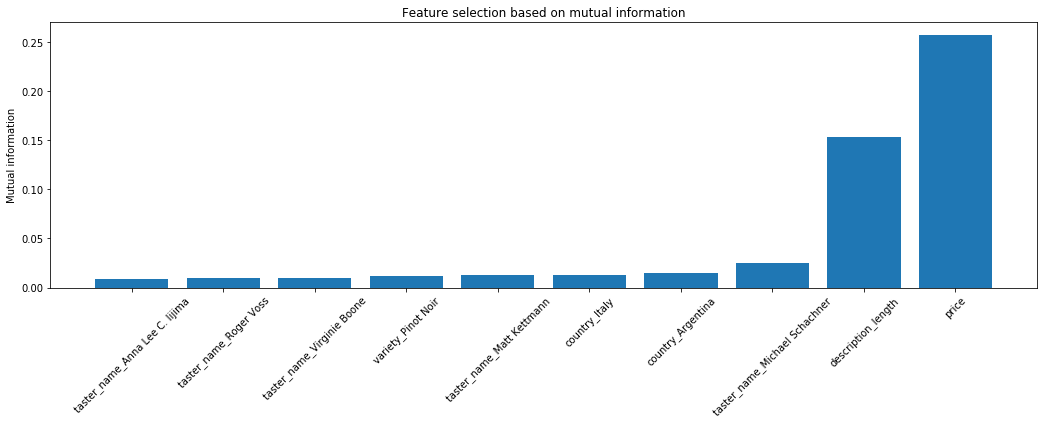

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

temp_wine_data = raw_wine_data.copy()

dropped_data = temp_wine_data.drop(['province', 'title', 'winery', 'designation', 'Unnamed: 0', 'description', 'region_2', 'taster_twitter_handle', 'title'], axis=1).dropna()

# Translate data through dummy encoding (one-hot encoding).
dumm_data = pd.get_dummies(dropped_data)
dumm_data_points = dumm_data.points
dumm_data = dumm_data.drop(['points'], axis=1)

# Fit features by taking the 10 best scores.
test = SelectKBest(score_func=mutual_info_classif, k=10)
fit = test.fit(dumm_data, dumm_data_points)

# Filter and sort labels and scores for the plot.
labels = dumm_data.columns[fit.get_support(indices=True)]
scores = fit.scores_[fit.get_support(indices=True)]
pairs = zip(labels, scores)

sorted_pairs = sorted(pairs, key=lambda t: t[1])
sorted_labels = list(zip(*sorted_pairs))[0]
sorted_scores = list(zip(*sorted_pairs))[1]
xs = [i for i in range(len(sorted_labels))]

plt.figure(figsize=(15, 6))

plt.xticks(xs, sorted_labels)
plt.tick_params(axis='x', rotation=45)
plt.title("Feature selection based on mutual information")
plt.ylabel("Mutual information")
plt.tight_layout()
plt.bar(xs, sorted_scores)
plt.savefig("../figures/feature_selection/Feature_selection")
plt.show()